In [1]:

from pandas import  *
from numpy import *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import required libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:

# Load the dataset
df = pd.read_csv('insurance_data.csv')



In [4]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [5]:

x=df[['age']]
y=df[['bought_insurance']]

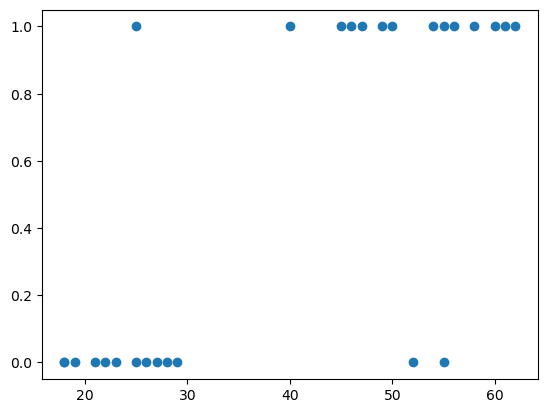

In [6]:
scatter(x,y)

In [7]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [8]:

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(units=4096, activation='relu', input_dim=1))
model.add(Dense(units=2048, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=5, validation_data=(X_test_scaled, y_test))


Epoch 1/10
5/5 [==============================] - 3s 150ms/step - loss: 0.6869 - accuracy: 0.4762 - val_loss: 0.6251 - val_accuracy: 0.3333
Epoch 2/10
5/5 [==============================] - 0s 94ms/step - loss: 0.5749 - accuracy: 0.5714 - val_loss: 0.4645 - val_accuracy: 0.3333
Epoch 3/10
5/5 [==============================] - 0s 91ms/step - loss: 1.1085 - accuracy: 0.5238 - val_loss: 0.4624 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 93ms/step - loss: 0.6893 - accuracy: 0.8571 - val_loss: 0.5135 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 88ms/step - loss: 0.5964 - accuracy: 0.8571 - val_loss: 0.5683 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 91ms/step - loss: 0.6074 - accuracy: 0.8571 - val_loss: 0.5676 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 94ms/step - loss: 0.5956 - accuracy: 0.8571 - val_loss: 0.5138 - val_accuracy: 1.0000
Epoch 8/10
5/5 [==========

In [24]:
score = model.evaluate(X_train_scaled, y_train)

# Print the test set accuracy
print("Train Set Accuracy:", score[1])


1/1 [==============================] - 0s 32ms/step - loss: 0.4215 - accuracy: 0.8571
Train Set Accuracy: 0.8571428656578064


In [18]:
score = model.evaluate(X_test_scaled, y_test)

# Print the test set accuracy
print("Test Set Accuracy:", score[1])


1/1 [==============================] - 0s 25ms/step - loss: 0.1357 - accuracy: 1.0000
Test Set Accuracy: 1.0


In [9]:
# Predict on user input data
Age = float(input("Enter the age: "))
user_data = pd.DataFrame(data={'age': [Age]})
user_data_scaled = scaler.transform(user_data)
prediction = (model.predict(user_data_scaled) >= 0.5).astype(int)

# Print the prediction
print("Predicted Label:", prediction[0])

1/1 [==============================] - 0s 152ms/step
Predicted Label: [0]


In [10]:
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [11]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Create base models
base_models = [
    ('svm', SVC(probability=True)),
    ('logreg', LogisticRegression()),
    ('dt', DecisionTreeClassifier())
]

# Create stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the model
accuracy = stacking_model.score(X_test, y_test)
print("Stacking Model Accuracy:", accuracy)


Stacking Model Accuracy: 1.0


c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [13]:
stacking_model.score(X_train,y_train)

0.8571428571428571

In [14]:
stacking_model.score(X_test,y_test)

1.0

In [12]:
from sklearn.ensemble import VotingClassifier

# Create base models
svm_model = SVC(probability=True)
logreg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()

# Create a voting classifier
voting_model = VotingClassifier(estimators=[('svm', svm_model), ('logreg', logreg_model), ('dt', dt_model)], voting='soft')

# Train the voting classifier
voting_model.fit(X_train, y_train)

# Evaluate the model
accuracy = voting_model.score(X_test, y_test)
print("Voting Model Accuracy:", accuracy)


Voting Model Accuracy: 1.0


c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [15]:
voting_model.score(X_train,y_train)

0.8571428571428571